In [4]:
import pandas as pd

# Define column names for the dataset
column_names = [
    "Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium",
    "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins",
    "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", "Proline"
]

# Load the dataset, skipping the first row which is a duplicate header
df = pd.read_csv('/content/drive/MyDrive/machine_learning/Wine dataset.csv', header=None, names=column_names, skiprows=1)

# Display the first few rows of the DataFrame to ensure it is loaded correctly
print(df.head())


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

            Class     Alcohol  Malic Acid         Ash  Alcalinity of Ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total Phenols  Flavanoids  Nonflavanoid Phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

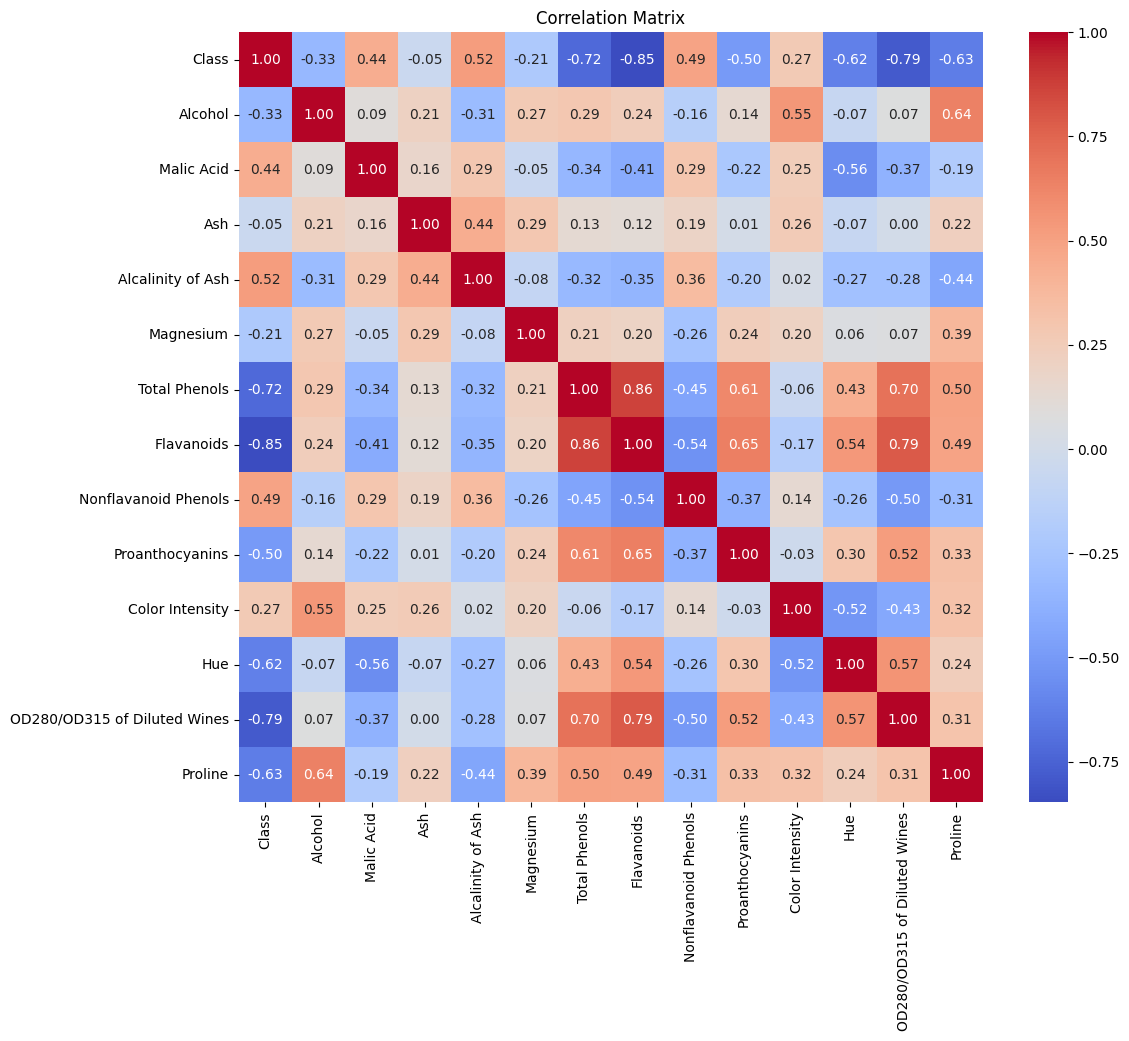

In [5]:
# Descriptive statistics for numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation matrix to understand the relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


###Implementing the Chosen Features

In [6]:

# Interaction between Total Phenols and Flavanoids
df['Phenols_Flavanoids_Interaction'] = df['Total Phenols'] * df['Flavanoids']

# Polynomial feature of Alcohol (square)
df['Alcohol_Squared'] = df['Alcohol'] ** 2

# Display the first few rows to see the new features
print(df.head())


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  \
0             5.64  1.04                          3.92     1065   
1             4.38  1.05

###Visualization of the New Features

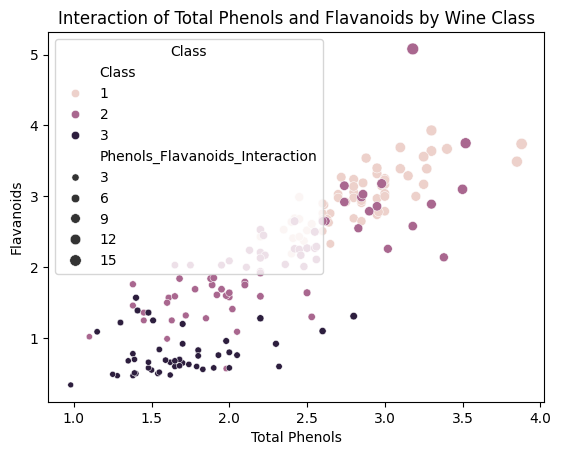

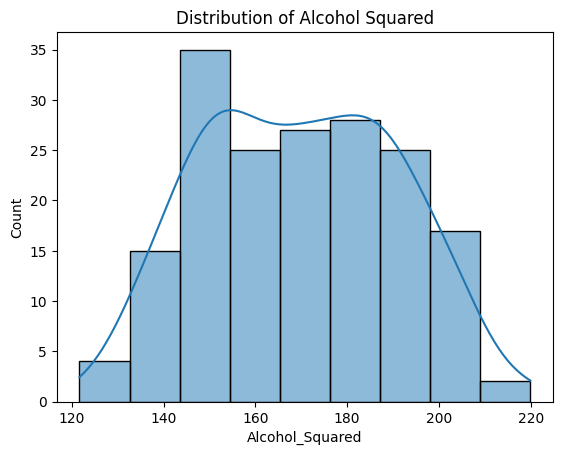

In [7]:


# Visualize the interaction feature
sns.scatterplot(x='Total Phenols', y='Flavanoids', size='Phenols_Flavanoids_Interaction', hue='Class', data=df)
plt.title('Interaction of Total Phenols and Flavanoids by Wine Class')
plt.legend(title='Class')
plt.show()

# Visualize the polynomial feature
sns.histplot(df['Alcohol_Squared'], kde=True)
plt.title('Distribution of Alcohol Squared')
plt.show()


###Model Selection and Preparation

####Data Preparation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and test sets
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###Setting Up Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4, 6]
}

# Setup the grid search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_rf.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9714285714285715


###Setting Up Support Vector Machine

In [11]:
from sklearn.svm import SVC

# Define the model
svm = SVC(random_state=42)

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Setup the grid search
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_svm.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best cross-validation score for SVM:", grid_svm.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.97192118226601


###Evaluating on Test Set

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions with Random Forest
rf_best = grid_rf.best_estimator_
predictions_rf = rf_best.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

# Predictions with SVM
svm_best = grid_svm.best_estimator_
predictions_svm = svm_best.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, predictions_svm)
report_svm = classification_report(y_test, predictions_svm)

print("Random Forest Test Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)

print("SVM Test Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)


Random Forest Test Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM Test Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

